%%latex \tableofcontents

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 300
import os
import torch.optim
import scipy.io
from torch import nn
from torch.utils.data import Dataset, DataLoader
master_dir = os.getcwd()
# For loading my own script:
%load_ext autoreload
%autoreload 2
import assignment2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define architecture to be used

In [131]:
def satlins(x):
    return np.where(abs(x) > 1, np.sign(x), x)

In [241]:
def linear(x):
    return x

In [255]:
class HopfieldNetwork:

    def __init__(self, attractors):
        # Attractors have shape N x Q
        n, q = np.shape(attractors)
        # Save the variables
        self.q = q
        self.n = n
        # Store the patterns as memory
        self.memory = attractors
        # Initialize the weights
        self.state = np.random.randint(-2, 2, (self.n, 1))
        self.weights = np.zeros((n, n))
        # TODO - Initialize the states?
        self.energies = []
        
        # Train the network as part of initialization
        self.train()

    def train(self):
        # hebbian learning
        self.weights = (1 / self.memory.shape[0]) * np.matmul(self.memory, self.memory.T)
        # make sure to fill the diagonals with zeroes
        np.fill_diagonal(self.weights, 0)

    def update_network_state(self, nb_of_updates, restart=False):
        # Random restart the initial state
        if restart:
            self.state = np.random.uniform(-1, 1, (self.n))
        # Save history    
        history = [self.state]
        
        for neuron in range(nb_of_updates):
            # Save current state to check convergence
            old_state = self.state
            # Asynchronous updates
            rand_index = np.random.randint(0, self.n)
            # Compute activation for randomly indexed neuron
            activation = np.dot(self.weights[rand_index, :], self.state)
            # Apply satlins activation function
            output = satlins(activation)
            output = linear(activation)
            self.state[rand_index] = output
            # Save into history
            history.append(self.state)
            
        return history

    def compute_energy(self):
        energy = -0.5 * np.dot(np.dot(self.state.T, self.weights), self.state)
        self.energies.append(energy)


In [260]:
hop.memory

array([[ 1, -1,  1],
       [ 1, -1, -1]])

Test:

In [256]:
patterns = [[1, 1], [-1, -1], [1, -1]]
patterns = np.transpose(patterns)  # to transpose or not to transpose? 
np.shape(patterns)

(2, 3)

In [257]:
# Create new HopfieldNetwork
hop = HopfieldNetwork(patterns)
hop.state
hop.weights

array([[0. , 0.5],
       [0.5, 0. ]])

Plot

[nan nan]


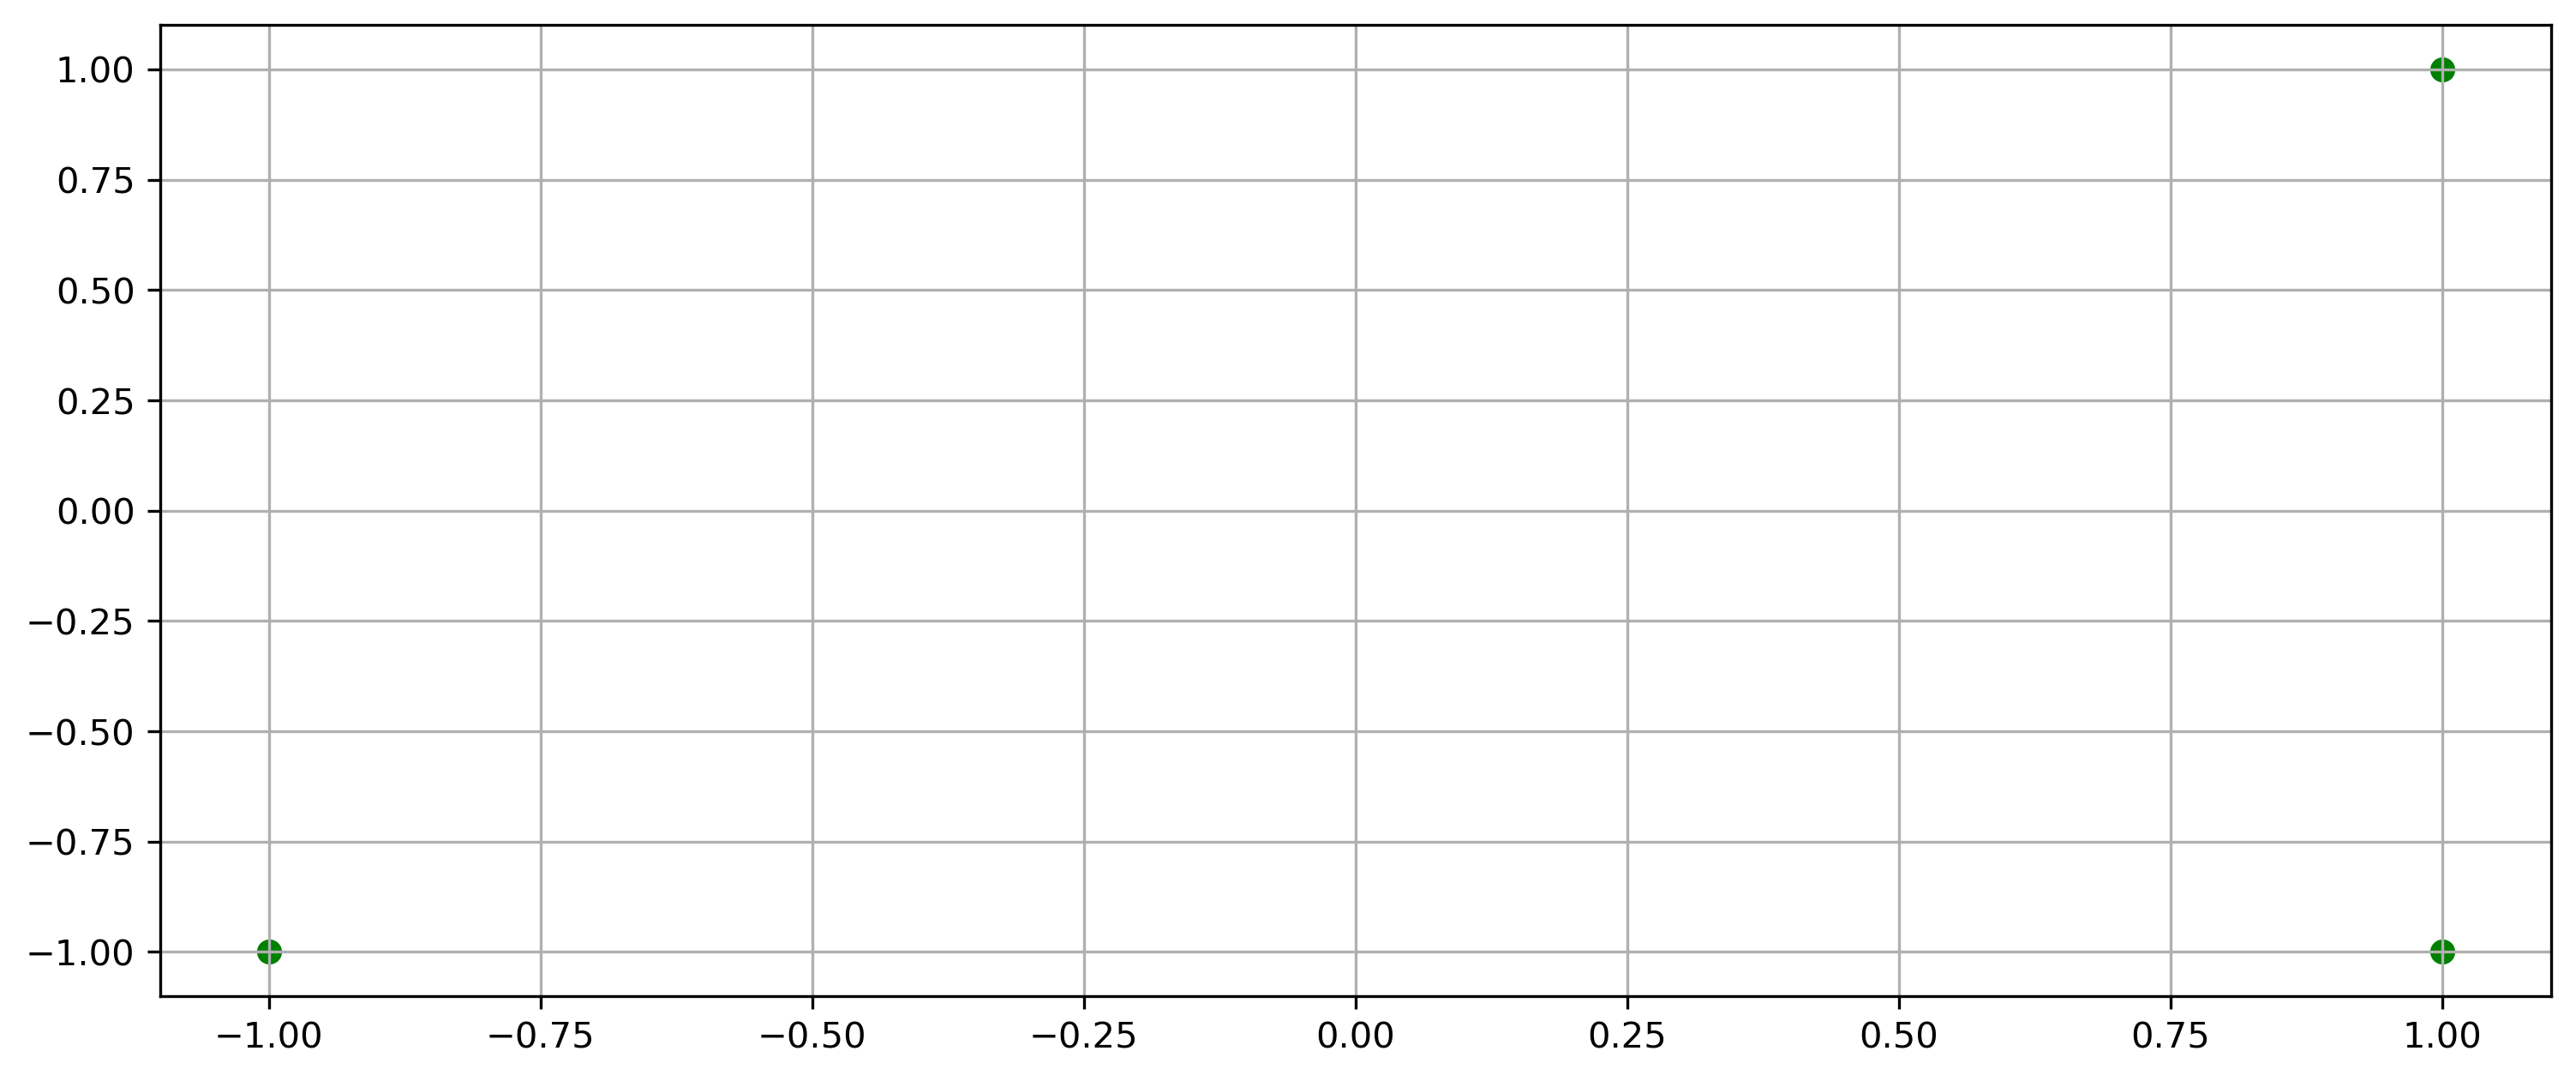

In [259]:
# HACKING INTO IT
hop.weights = np.array([[1.16, 0], [0, 1.16]])
# Choose the state
hop.state = np.array([-0.8, 0.8])
history = hop.update_network_state(10000, restart=True)
print(history[0])
x, y = np.transpose(history)

delta = 0.1
# Plot the trajectory
plt.plot(x, y, color='red', label='Trajectory')
plt.scatter(x[0], y[0], color='red')
plt.xlim(-1-delta, 1+delta)
plt.ylim(-1-delta, 1+delta)
for pattern in np.transpose(patterns):
    plt.scatter(pattern[0], pattern[1], color="green", label="Patterns")
plt.grid()
plt.show()